In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import sympy as sp
import scipy.signal

## 1. feladat
Ábrázold az alábbi sorozatokat, és határozd meg a $Z$-transzformáltjaikat! Vázold fel a zérus-pólus ábrát, jelölve a konvergencuiatartományt!
* $x[n]=\left(\frac{1}{2}\right)^n(u[n]-u[n-10])$,
* $x[n]=\left(\frac{1}{2}\right)^{|n|}$,
* $x[n]=(5)^{|n|}$,
* $x[n]=\left(\frac{1}{2}\right)^n\cos(\pi n  /3)u[n]$.

### Z transzfolmált: X(z) = $\sum_{n=-\infty}^{\infty} x[n] \cdot z^{-n}$

### Konvergencia tartomány:  $\mathrm{ROC} = \left[z : \left|\sum_{n=-\infty}^{\infty} x[n]z^{-n} \right| < \infty \right] $

## Első sorozat

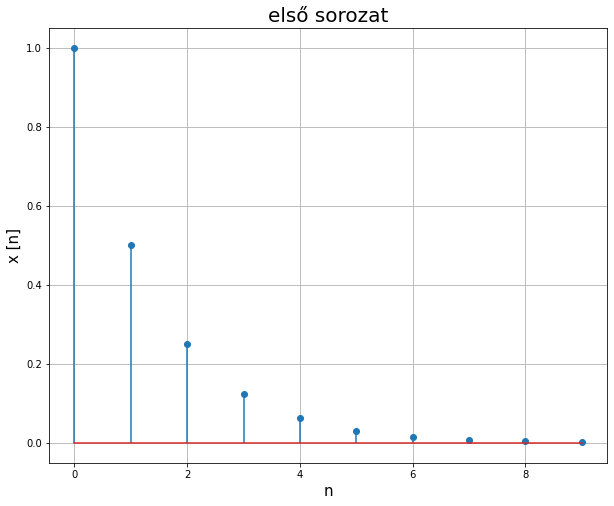

In [3]:
n1 = np.arange(0, 10)
x_n1 = (1/2)**n1 * (np.heaviside(n1, 1) - np.heaviside(n1-10, 1))
figure(figsize=(10,8))
plt.stem(n1, x_n1)
plt.xlabel('n', size = 15)
plt.ylabel('x [n]', size = 15)
plt.title("első sorozat", size = 20)
plt.grid(True)
plt.show()

A sorozat n=10-től kezdve nulla értékeket vesz fel. Így a képlet:
$X(z) = \underset{n=0}{\overset{9}{\sum}} \left(\left(\frac{1}{2}\right)^n \cdot z^{-n}\right) =  \underset{n=0}{\overset{9}{\sum}} (2z)^{-n} = \frac{1}{2^0} \cdot \frac{1}{z^0} + ... + \frac{1}{2^9} \cdot \frac{1}{z^9}$ 

## Második sorozat

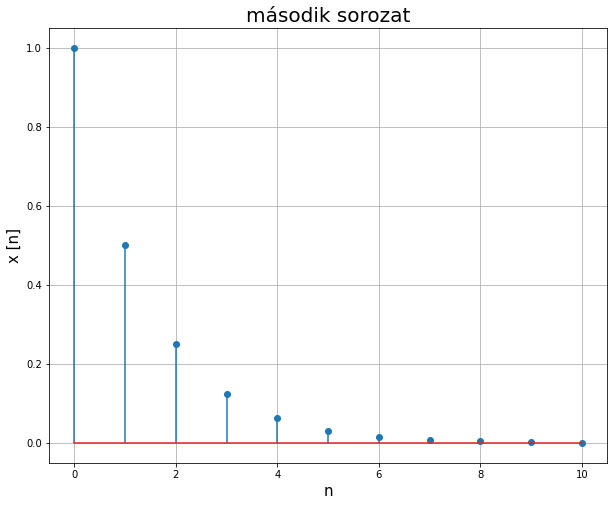

In [4]:
n2 = np.arange(0, 11)
x_n2 = (1/2)**n2 
figure(figsize=(10,8))
plt.stem(n2, x_n2)
plt.xlabel('n',size = 15)
plt.ylabel('x [n]', size = 15)
plt.title("második sorozat", size = 20)
plt.grid(True)
plt.show()

Az előzőhőz képest a különbség, hogy sosem éri el a nullát, csak megközelíti.

$X(z) = \sum \left(\frac{1}{2}\right)^n \cdot z^{-n} = \sum \left(\frac{1}{2}\right)^{|n|} \cdot \left(\frac{1}{z}\right)^{|n|}$ 




A végtelen mértani sor, ha $|q| < 1$: $\sum_{n=m}^{\infty} q^n = \frac{q^m}{1-q}$ képletét felhasználva, jelen estben m = 0 $\to$  $\sum_{n=0}^{\infty} q^n = \frac{1}{1-q}$


$X(z) = \frac{1}{\left(1- \frac{1}{2}\cdot \frac{1}{z}\right)} = \frac{1}{1-\frac{1}{2z}} = \frac{z}{z-0.5}$


ROC = { |z| : [0.5,$\infty$]}



forrás: https://hu.wikipedia.org/wiki/Mértani_sorozat

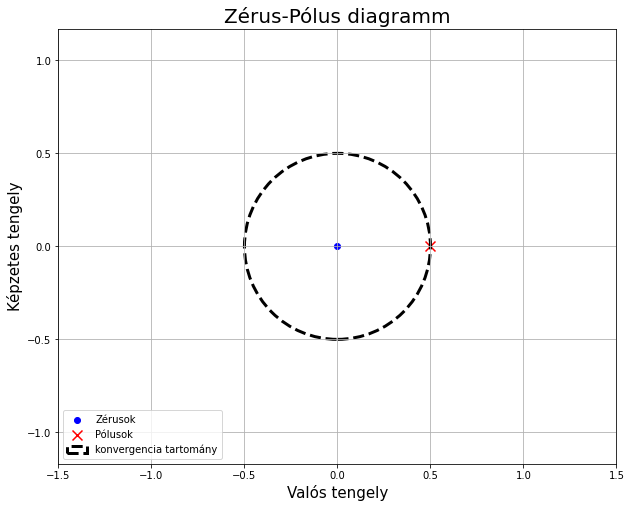

In [5]:
zeros = [0] #ahol számláló
poles = [0.5] #ahol nevező

# Ábrázolás a komplex síkon
fig, ax = plt.subplots(figsize=(10,8))
for zero in zeros:
    ax.scatter(np.real(zero), np.imag(zero), marker='o', color='b', label='Zérusok')
for pole in poles:
    ax.scatter(np.real(pole), np.imag(pole), marker='x', color='r', label='Pólusok', s = 100)

    
unit_circle = plt.Circle((0, 0), 0.5, fill=False, color='k', linestyle='--', linewidth=3,label = "konvergencia tartomány")
ax.add_artist(unit_circle)
ax.axis("equal")


ax.legend(loc = "lower left")
ax.set_title('Zérus-Pólus diagramm', size = 20)
ax.grid(True)
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_xlabel("Valós tengely", size = 15)
ax.set_ylabel("Képzetes tengely", size = 15)

plt.show()


A körön kívűl helyezkedik el a konvergencia tartomány.

### haramadik sorozat

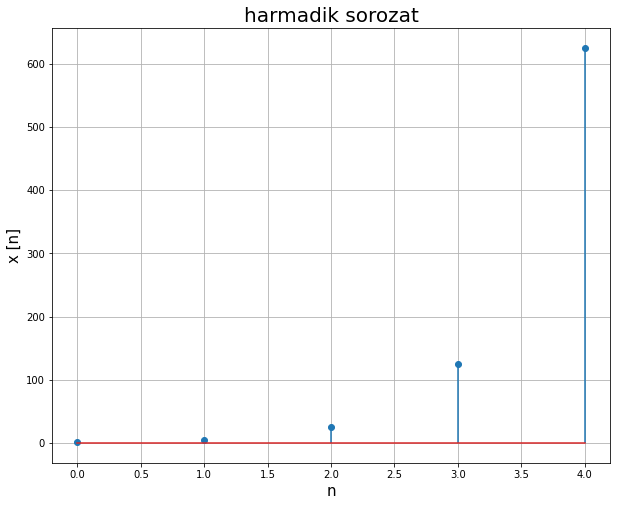

In [6]:
n3 = np.arange(0, 5)
x_n3 = 5**n3 
figure(figsize=(10,8))
plt.stem(n3, x_n3)
plt.xlabel('n', size = 15)
plt.ylabel('x [n]', size = 15)
plt.title("harmadik sorozat", size = 20)
plt.grid(True)
plt.show()

$X(z) = \underset{n=0}{\overset{\infty}{\sum}} \left(\left(5\right)^{|n|} \cdot z^{-n}\right) = \underset{n=0}{\overset{\infty}{\sum}} \left(\frac{5}{z}\right)^{|n|}$

Megint a geometriai sor "hagyományos" alakját alkalmazva: $S_n = a_1 \frac{q^n-1}{q-1}$

A sorozat végtelenedik tagja így: $\frac{5^0}{z^0}\cdot \frac{\frac{5^{\infty}}{z^{\infty}}-1}{\frac{5}{z}-1}$. Abban az esetben ha $\frac{5}{|z|} > 1$ a sorozat a végtelenbe tart, tehát nem konvergens, így a számunkra érdekes eset ismét a $q < 1$ azaz $\frac{5}{|z|} < 1$ lesz. 

Ebből az ROC = {|z| : [0,5]}

A második sorozatnál felhasznált képletet alkalmazva q < 1 esetre:


$X(z) = \frac{1}{1- \frac{5}{z}}  = \frac{z}{z-5}$


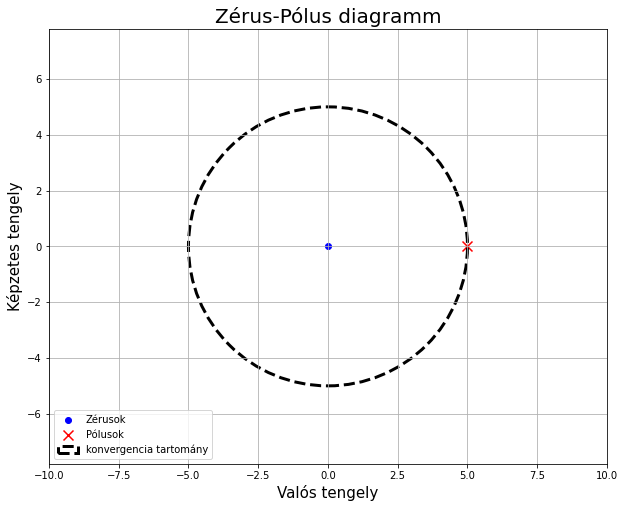

In [7]:
zeros = [0]
poles = [5]

# Ábrázolás a komplex síkon
fig, ax = plt.subplots(figsize=(10,8))
for zero in zeros:
    ax.scatter(np.real(zero), np.imag(zero), marker='o', color='b', label='Zérusok')
for pole in poles:
    ax.scatter(np.real(pole), np.imag(pole), marker='x', color='r', label='Pólusok', s = 100)

# Konvergencia tartomány meghatározása
unit_circle = plt.Circle((0, 0), 5, fill=False, color='k', linestyle='--', linewidth=3,label = "konvergencia tartomány")
ax.add_artist(unit_circle)
ax.axis("equal")
# Címkék és jelmagyarázat
ax.legend(loc = "lower left")
ax.set_title('Zérus-Pólus diagramm', size = 20)
ax.grid(True)
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_xlabel("Valós tengely", size = 15)
ax.set_ylabel("Képzetes tengely", size = 15)

plt.show()


Ebben az esetben pont, hogy a körön belüli tartomány a konvergens tartomány.

### negyedik sorozat:


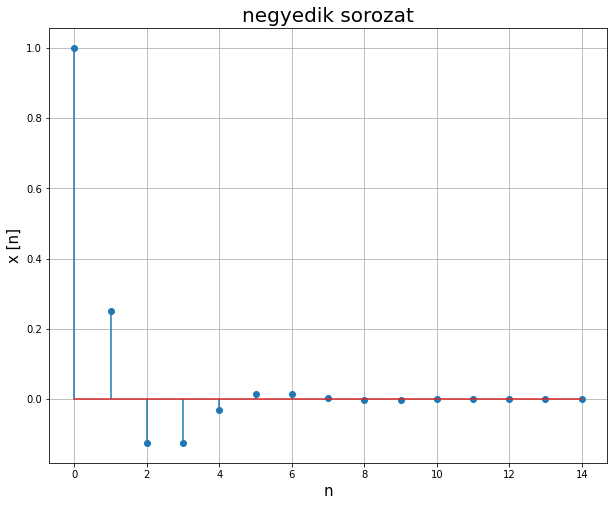

In [8]:
n = np.arange(0, 15)
x = (1/2)**n * np.cos(np.pi * n / 3)
figure(figsize=(10,8))
stem(n, x)
title('negyedik sorozat', size = 20)
ylabel('x [n]', size = 15)
xlabel('n', size = 15)
grid(True)
show()


A z-transzfolmáltja:
$X(z) = \underset{n=0}{\overset{\infty}{\sum}} \left(\frac{1}{2}\right)^{n} \cdot \cos{\left(\frac{\pi n}{3}\right)} \cdot u[n] \cdot z^{-n} = \underset{n=0}{\overset{\infty}{\sum}} \left(\frac{1}{2z}\right)^n \cdot \cos{\left(\frac{\pi n}{3}\right)}
$
  
Ezen z transzformált meghatározásához a https://en.wikipedia.org/wiki/Z-transform - oldalon fellelhető Table of common Z-transform pairs táblázat 21. sorában található kifejezést használtam:

The Z transform of a singal of $a^n\cos{(\omega_0 n)}u[n]$ is $\frac{1-az^{-1}\cos{(\omega_0)}}{1-2az^{-1}cos(\omega_0)+a^2z^{-2}}$, ennek a párja a 4 feladatban le van vezetve.

"a" helyére 1/2-et írva és $\omega_0$ helyére $\frac{\pi}{3}$-at, a sympy csomag segítségével meghatároztam a zérusokat (számláló nulla), valamint a pólusokat (nevező nulla)

In [9]:
z = sp.symbols('z')

# Definiáljuk az átviteli függvényt
H = (1 - (1/2)*z**(-1)*sp.cos(sp.pi/3)) / (1 - z**(-1)*sp.cos(sp.pi/3) + (1/4)*z**(-2))

# Zérusok kiszámítása
zeros = sp.solve(sp.numer(H), z)

# Pólusok kiszámítása
poles = sp.solve(sp.denom(H), z)
print(zeros)
print(poles)

[0.250000000000000]
[0.25 - 0.433012701892219*I, 0.25 + 0.433012701892219*I]


ROC = { |z| : (0.25,$\infty$) }

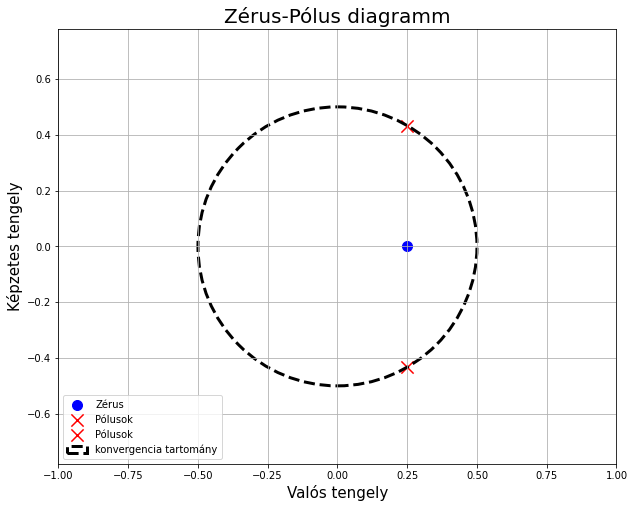

In [10]:
zeros = [0.25]
poles = [complex(0.25,0.433012701892219),complex(0.25,-0.433012701892219) ]
# Ábrázolás a komplex síkon
fig, ax = plt.subplots(figsize=(10,8))
for zero in zeros:
    ax.scatter(np.real(zero), np.imag(zero), marker='o', color='b', label='Zérus', s = 100)
for pole in poles:
    ax.scatter(np.real(pole), np.imag(pole), marker='x', color='r', label='Pólusok', s = 150)

# Konvergencia tartomány meghatározása
unit_circle = plt.Circle((0, 0), 0.5, fill=False, color='k', linestyle='--', linewidth=3,label = "konvergencia tartomány")
ax.add_artist(unit_circle)
ax.axis("equal")
# Címkék és jelmagyarázat
ax.legend(loc = "lower left")
ax.set_title('Zérus-Pólus diagramm', size = 20)
ax.grid(True)
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_xlabel("Valós tengely", size = 15)
ax.set_ylabel("Képzetes tengely", size = 15)

plt.show()


A konvergencia tartomány a körön kívűl található.

## 2. feladat
Határozd meg az alábbi kifejezés inverz $Z$-transzformáltját:
$$X(z)=z^2\left(1-\frac{1}{3}z^{-1}\right)(1-z^{-1})(1+2z^{-2})!$$

In [11]:
z = sp.symbols('z')

# Definiáljuk az átviteli függvényt
H = z**2*(1-1/3*z**(-1))*(1-z**(-1))*(1+2*z**(-2))

# Zérusok kiszámítása
zeros = sp.solve(sp.numer(H), z)

# Pólusok kiszámítása
poles = sp.solve(sp.denom(H), z)
print(zeros)
print(poles)

[0.333333333333333, 1.00000000000000, -1.4142135623731*I, 1.4142135623731*I]
[]


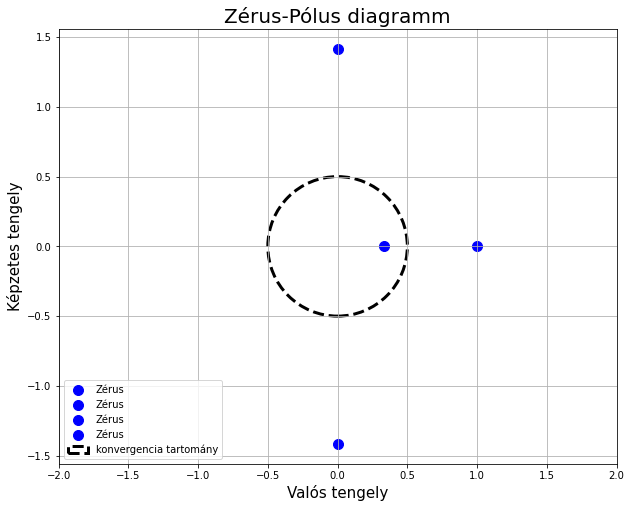

In [12]:
zeros = [0.33,1,complex(0,-1.414),complex(0,1.414)]
poles = []
# Ábrázolás a komplex síkon
fig, ax = plt.subplots(figsize=(10,8))
for zero in zeros:
    ax.scatter(np.real(zero), np.imag(zero), marker='o', color='b', label='Zérus', s = 100)
for pole in poles:
    ax.scatter(np.real(pole), np.imag(pole), marker='x', color='r', label='Pólusok', s = 150)

# Konvergencia tartomány meghatározása
unit_circle = plt.Circle((0, 0), 0.5, fill=False, color='k', linestyle='--', linewidth=3,label = "konvergencia tartomány")
ax.add_artist(unit_circle)
ax.axis("equal")
# Címkék és jelmagyarázat
ax.legend(loc = "lower left")
ax.set_title('Zérus-Pólus diagramm', size = 20)
ax.grid(True)
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_xlabel("Valós tengely", size = 15)
ax.set_ylabel("Képzetes tengely", size = 15)

plt.show()

## 3. feladat

Diszkrét idejű lineáris időinvariáns rendszer stabilitásának szükséges és elégséges feltétele, hogy a $Z$-transzformált pólusai az egységkörön belül helyezkedjenek el.

Tekintsük az alábbi két rendszert:
$$G_a[z] = \frac{3z}{(z - 0.5)(z + 0.5)}$$


$$G_b[z] = \frac{z}{(z - 1.5)(z − 0.5)}$$

* Állapítsd meg a rendszerek egységimpulzusra adott válaszait ($g_a[n]$-t és $g_b[n]$-t), meghatározva az inverz $Z$-transzformációkat. Vizsgáld meg a rendszerek stabilitását!
* Add meg a két rendszer egységlépcsőre adott válaszát! Konvergens a válaszjelek alakja?

## A 2-2 levezetés a 3a1-2 és 3b1-2 fotók tartalmazzák a mappában mellékelve.

### Első rendszer

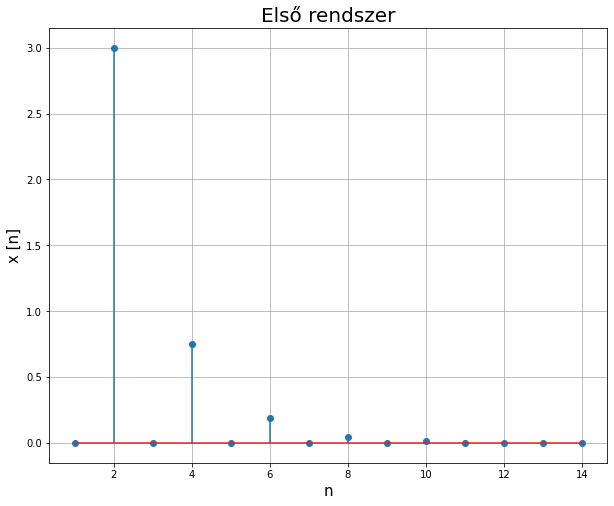

In [13]:
n = np.arange(1, 15)
x = 3*(0.5)**(n-1) - 3*(-0.5)**(n-1)
figure(figsize=(10,8))
stem(n, x)
title('Első rendszer', size = 20)
ylabel('x [n]', size = 15)
xlabel('n', size = 15)
grid(True)
show()

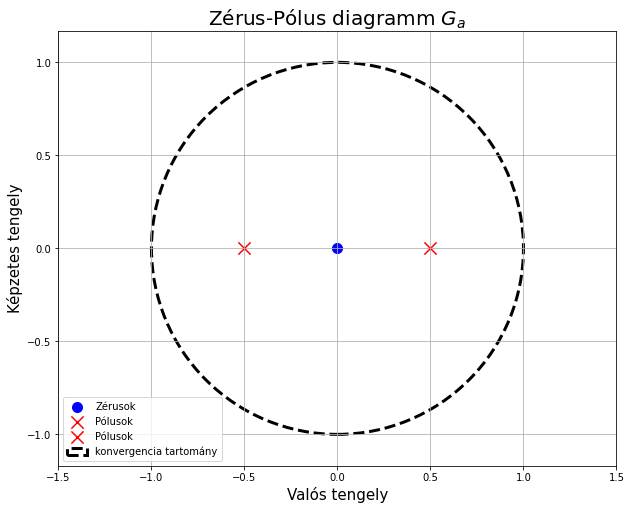

In [14]:
zeros = [0]
poles = [0.5,-0.5]
# Ábrázolás a komplex síkon
fig, ax = plt.subplots(figsize=(10,8))
for zero in zeros:
    ax.scatter(np.real(zero), np.imag(zero), marker='o', color='b', label='Zérusok', s = 100)
for pole in poles:
    ax.scatter(np.real(pole), np.imag(pole), marker='x', color='r', label='Pólusok', s = 150)

# Konvergencia tartomány meghatározása
unit_circle = plt.Circle((0, 0), 1, fill=False, color='k', linestyle='--', linewidth=3,label = "konvergencia tartomány")
ax.add_artist(unit_circle)
ax.axis("equal")
# Címkék és jelmagyarázat
ax.legend(loc = "lower left")
ax.set_title(r'Zérus-Pólus diagramm $G_a$', size = 20)
ax.grid(True)
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_xlabel("Valós tengely", size = 15)
ax.set_ylabel("Képzetes tengely", size = 15)

plt.show()


Ez teljesítni a stabilitás feltételét, mert mindkét pólus az egység körön belül található meg.

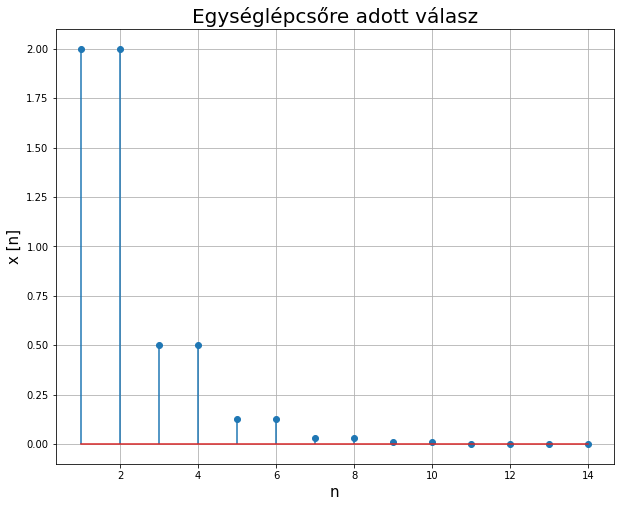

In [15]:
n = np.arange(1, 15)
x = 3 *(1/2)**(n-1) -(-1/2)**(n-1)
figure(figsize=(10,8))
stem(n, x)
title('Egységlépcsőre adott válasz', size = 20)
ylabel('x [n]', size = 15)
xlabel('n', size = 15)
grid(True)
show()

Az egységlépcsőre adott válasz is konvergens

### Második rendszer

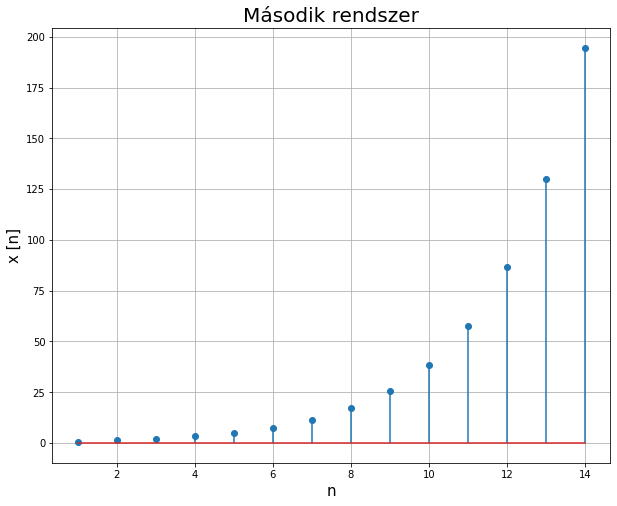

In [16]:
n = np.arange(1, 15)
x = 1*(1.5)**(n-1) -0.5*(0.5)**(n-1)
figure(figsize=(10,8))
stem(n, x)
title('Második rendszer', size = 20)
ylabel('x [n]', size = 15)
xlabel('n', size = 15)
grid(True)
show()

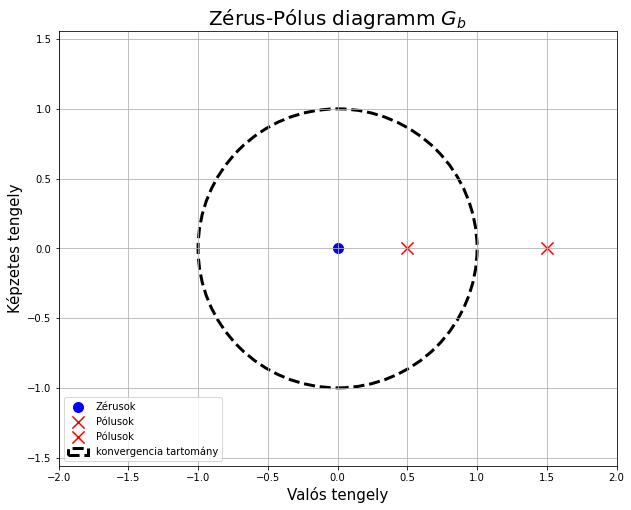

In [17]:
zeros = [0]
poles = [0.5,1.5]
# Ábrázolás a komplex síkon
fig, ax = plt.subplots(figsize=(10,8))
for zero in zeros:
    ax.scatter(np.real(zero), np.imag(zero), marker='o', color='b', label='Zérusok', s = 100)
for pole in poles:
    ax.scatter(np.real(pole), np.imag(pole), marker='x', color='r', label='Pólusok', s = 150)

# Konvergencia tartomány meghatározása
unit_circle = plt.Circle((0, 0), 1, fill=False, color='k', linestyle='--', linewidth=3,label = "konvergencia tartomány")
ax.add_artist(unit_circle)
ax.axis("equal")
# Címkék és jelmagyarázat
ax.legend(loc = "lower left")
ax.set_title(r'Zérus-Pólus diagramm $G_b$', size = 20)
ax.grid(True)
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_xlabel("Valós tengely", size = 15)
ax.set_ylabel("Képzetes tengely", size = 15)

plt.show()

Nem teljesíti a stabilitás feltételét.

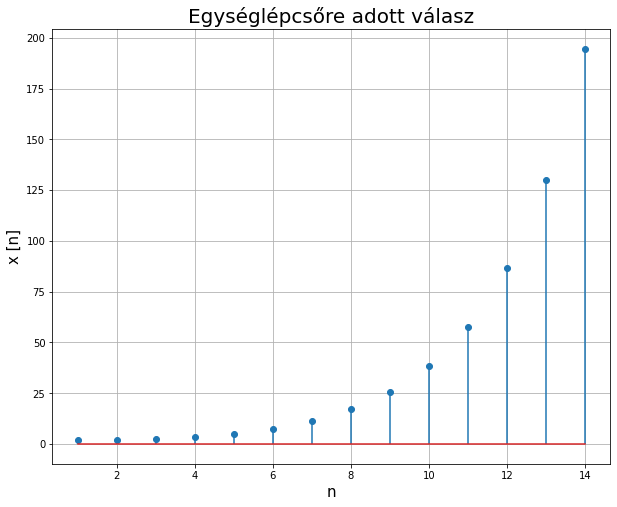

In [18]:
n = np.arange(1, 15)
x = 1 *(1/2)**(n-1) + (3/2)**(n-1)
figure(figsize=(10,8))
stem(n, x)
title('Egységlépcsőre adott válasz', size = 20)
ylabel('x [n]', size = 15)
xlabel('n', size = 15)
grid(True)
show()

Az egységlépcsőre adott válsz sem konvergens

## 4. feladat
Bizonyítsd be, hogy az alábbi két kifejezés közott a $Z$-transzformáció teremt kapcsolatot:
1. $x[n]=r^n\sin(\omega_0n)u[n]$,
2. $X(z)=\frac{r\sin\omega_0\,z^{-1}}{1-2r\cos\omega_0\,z^{-1}+r^2z^{-2}}$, ahol $|z|>r$.

A levezetést a 4.1-2 című fotók tartalmazzák.

## 5. feladat

A kauzális jelsorozatok $Z$-transzformáltjára meghatározott kifejezés ellenőrzésére a `scipy.signal.lfilter()` függvényt alkalmazhatjuk.
Legyen a $x[n]$ kauzális sorozat transzformáltja az alábbi racionális kifejezés $X(z) = B(z)/A(z)$.

* Lásd be, hogy az alábbi kódrészlet az $x[n]$ első $N+1$ elemét generálja, ahol jelölje az $A(z)$ illetve a $B(z)$ polinom együtthatóinak vektorát $a$ és $b$.

```python
x = lfilter(b, a, concatenate([ones(1), zeros(N - 1)]))
```

* Határozd meg a $x[n] = \left[\left(\frac{1}{2}\right)^n + \left(-\frac{1}{3}\right)^n\right] u[n]$ sorozathoz $X(z)$-t.
* Ellenőrizd az eredményeket numerikusan.

In [19]:
x = scipy.signal.lfilter(b, a, concatenate([ones(1), zeros(N - 1)]))

NameError: name 'b' is not defined

## 6. feladat
Írd fel az alábbi 1-dimenziós jelekre alkalmazható szűrőket a $Z$-doménben:
* $n$-ablakhosszúságú mozgó átlag,
* $n$-tartójú Gauss-szűrő,
* differenciáló operátor,
* magasabb rendű differenciáló operátor,
* IIR leaky-integrátor (mint a differenciáló operátor inverze).
Becsüld meg a rendszer késleltetését!

## 7. feladat
Kössünk két digitális szűrőt egymás után kaszkádba. Az együtthatók legyenek rendre ($b_1, a_1$) és ($b_2, a_2$). 
Lehetséges egy eredő szűrővel helyettesíteni az eredeti szűrőket? Hogy néznek ki az új szűrő együtthetői?

## 8. feladat
Legyen a kauzális $x[n]$ sorozat $Z$-transzformáltja $X(z)$, ami eltűnik $z_0=-1$ helyen és 3 pólusa $z_p\in\left\{45, -13(1\pm \mathbf{j})\right\}$. Határozd meg az $y[n]:=x[-n+2]$ sorozat $Y(z)$ $Z$-transzformáltját zérushelyeit, pólusait és a konvergenciatartományát!

## 9. feladat
Vegyük a $x[n] = b^n u[-n-1]$ valós sorozatot, amelyik abszolút felösszegezhető ($|b| > 1$). 
* határozd meg az autokorreláció $Z$-transzformáltját $R_{xx}(z)$-t,
* vázold a zérushelyeit, pólusait a konvergenciatartományt,
* állapítsd meg a sorozat autokorrelációját $r_{xx}[n]$-t!